# Import Nessecarry Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Read The Data

In [2]:
df = pd.read_csv("heart.csv")

# check length

In [3]:
print("Dataset length:", len(df))

Dataset length: 920


# Display Sample Of Data

In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Plot the distribution of the target variable 'num'

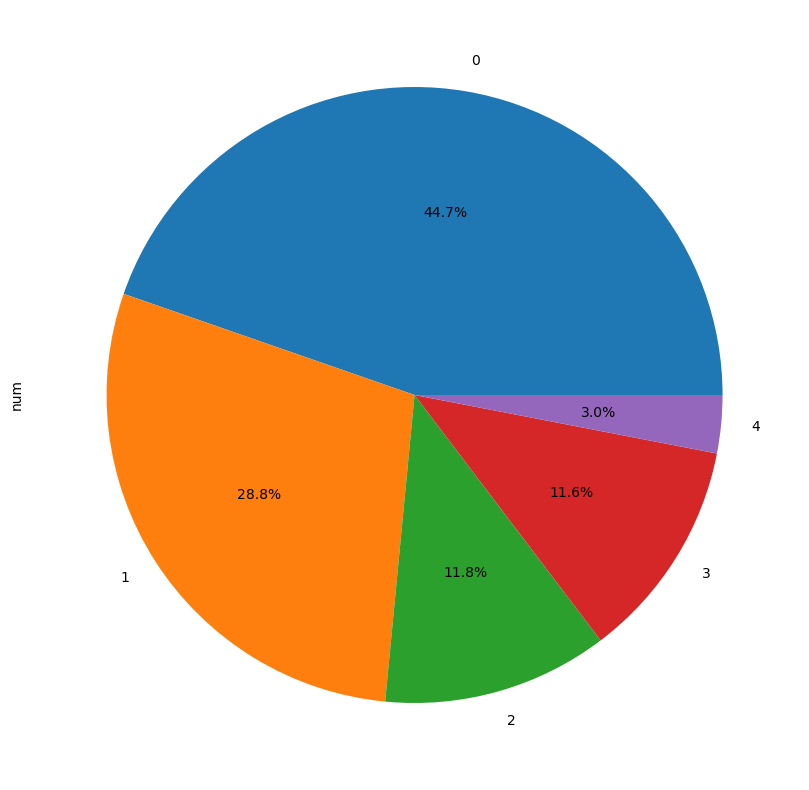

In [5]:
plt.figure(figsize=(16, 10))
df['num'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

# Display class distribution

In [6]:
class_distribution = df['num'].value_counts()
print("Class distribution:\n", class_distribution)

Class distribution:
 0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64



# Function to augment data for a specific class label

In [7]:
def augment_data(df, class_label, n_augmentations):
    df_class = df[df['num'] == class_label]
    augmented_data = []
    
    for _ in range(n_augmentations):
        df_aug = df_class.copy()
        # Add random noise to specific columns
        df_aug['age'] = df_aug['age'] + np.random.randint(-3, 4, df_aug.shape[0])
        df_aug['trestbps'] = df_aug['trestbps'] + np.random.randint(-3, 4, df_aug.shape[0])
        df_aug['chol'] = df_aug['chol'] + np.random.randint(-3, 4, df_aug.shape[0])
        df_aug['thalch'] = df_aug['thalch'] + np.random.randint(-3, 4, df_aug.shape[0])
        
        augmented_data.append(df_aug)
    
    return pd.concat(augmented_data)

# Augment data for different classes

In [8]:
df_class_1_augmented = augment_data(df, class_label=1, n_augmentations=2)
df_class_2_augmented = augment_data(df, class_label=2, n_augmentations=5)
df_class_3_augmented = augment_data(df, class_label=3, n_augmentations=5)
df_class_4_augmented = augment_data(df, class_label=4, n_augmentations=13)

# Combine the original and augmented data

In [9]:
df = pd.concat([df, df_class_1_augmented, df_class_2_augmented, df_class_3_augmented, df_class_4_augmented])
df = df.sample(frac=1).reset_index(drop=True)

# Plot the updated distribution of the target variable

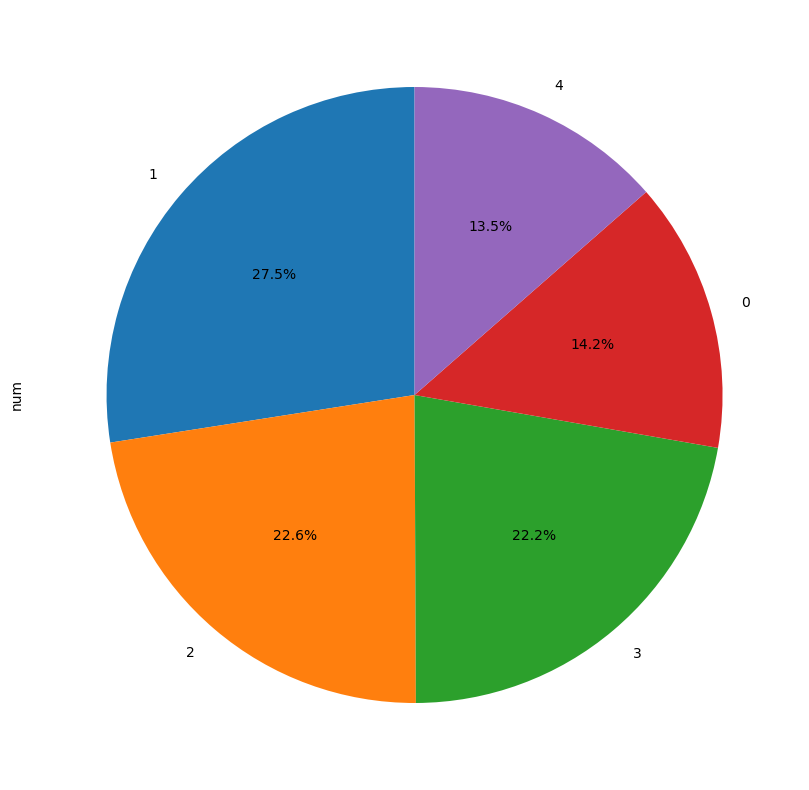

In [10]:
plt.figure(figsize=(16, 10))
df['num'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.show()

# check length

In [11]:
print("Dataset length:", len(df))

Dataset length: 2894


# check unique values

In [12]:
df['dataset'].unique()

array(['VA Long Beach', 'Hungary', 'Cleveland', 'Switzerland'],
      dtype=object)

# check null values

In [13]:
df.isnull().sum()

id             0
age            0
sex            0
dataset        0
cp             0
trestbps     239
chol          72
fbs          366
restecg        6
thalch       207
exang        207
oldpeak      238
slope        720
ca          1935
thal        1415
num            0
dtype: int64

# Drop Un necessary columns

In [14]:
df.drop(['id'], axis=1, inplace=True)

# Replace categorical labels with numerical data

In [15]:
df['dataset'] = df['dataset'].map({
    'Cleveland': 1,
    'Hungary': 2,
    'Switzerland': 3,
    'VA Long Beach': 4
})

df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

df['cp'] = df['cp'].map({
    'typical angina': 1,
    'atypical angina': 2,
    'non-anginal': 3,
    'asymptomatic': 4
})

df['restecg'] = df['restecg'].map({
    'normal': 0,
    'stt abnormality': 1,
    'lv hypertrophy': 2
})

df['fbs'] = df['fbs'].map({1: 1, 0: 0})
df['exang'] = df['exang'].map({1: 1, 0: 0})
df['slope'] = df['slope'].map({'downsloping': 1, 'flat': 2, 'upsloping': 3})
df['thal'] = df['thal'].map({'normal': 1, 'fixed defect': 2, 'reversible defect': 3})

# Fill missing values based on group means/modes

In [16]:
df['trestbps'] = df.groupby('num')['trestbps'].transform(lambda x: x.fillna(x.mean()))
df['chol'] = df.groupby('num')['chol'].transform(lambda x: x.fillna(x.mean()))
df['thalch'] = df.groupby('num')['thalch'].transform(lambda x: x.fillna(x.mean()))
df['oldpeak'] = df.groupby('num')['oldpeak'].transform(lambda x: x.fillna(x.mean()))
df['fbs'] = df.groupby('num')['fbs'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
df['restecg'] = df.groupby('num')['restecg'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
df['exang'] = df.groupby('num')['exang'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
df['slope'] = df.groupby('num')['slope'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
df['thal'] = df.groupby('num')['thal'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
df['ca'] = df.groupby('num')['ca'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))

# Convert columns to integers after filling missing values

In [17]:
df['fbs'] = df['fbs'].astype(int)
df['restecg'] = df['restecg'].astype(int)
df['exang'] = df['exang'].astype(int)
df['slope'] = df['slope'].astype(int)
df['ca'] = df['ca'].astype(int)
df['thal'] = df['thal'].astype(int)

# check null values

In [18]:
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Visualize feature distributions

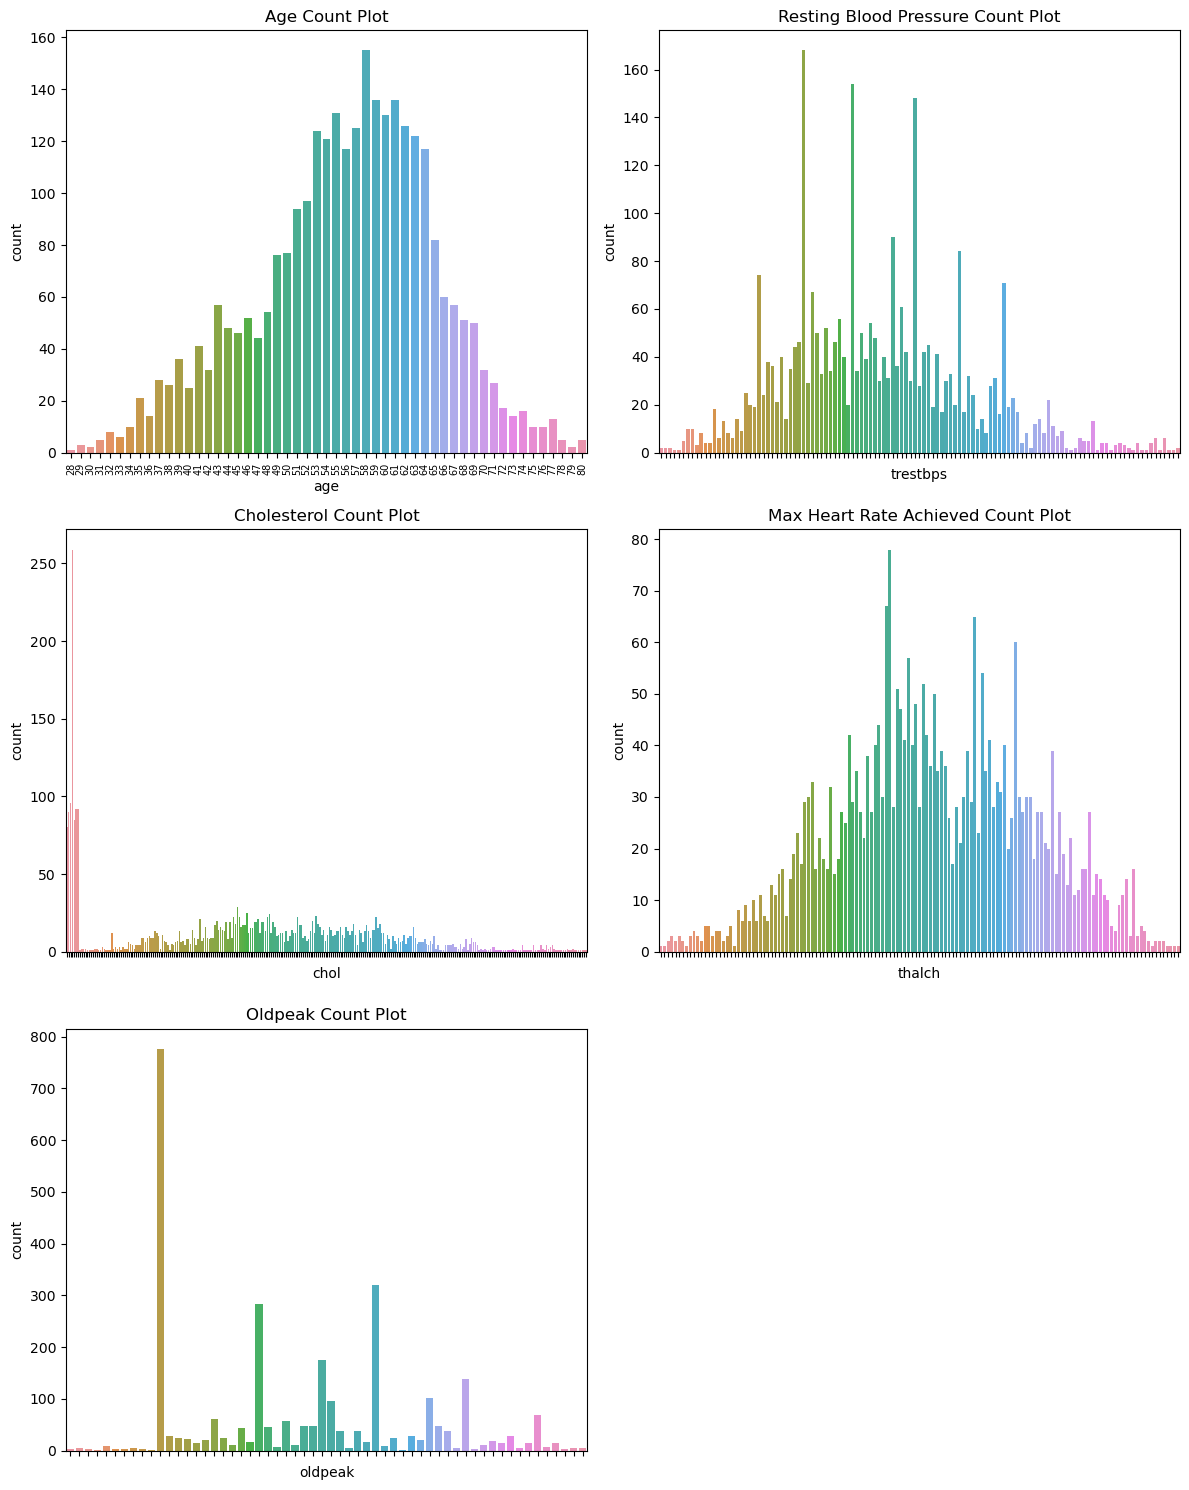

In [19]:
fig, axs = plt.subplots(3 , 2, figsize=(12, 15))

sns.countplot(x='age', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Age Count Plot')
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=7)

sns.countplot(x='trestbps', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Resting Blood Pressure Count Plot')
axs[0, 1].set_xticklabels([])

sns.countplot(x='chol', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Cholesterol Count Plot')
axs[1, 0].set_xticklabels([])

sns.countplot(x='thalch', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Max Heart Rate Achieved Count Plot')
axs[1, 1].set_xticklabels([])

sns.countplot(x='oldpeak', data=df, ax=axs[2, 0])
axs[2, 0].set_title('Oldpeak Count Plot')
axs[2, 0].set_xticklabels([])

fig.delaxes(axs[2, 1])
plt.tight_layout()
plt.show()

In [20]:
df['chol'].dropna().sort_values()

1409     -3.0
623      -3.0
1965     -3.0
1650     -3.0
2548     -3.0
        ...  
1030    530.0
1414    564.0
428     601.0
2100    603.0
2150    606.0
Name: chol, Length: 2894, dtype: float64

# Create bins for continuous variables for easier interpretation

In [21]:
df['age'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], labels=[1, 2, 3, 4, 5])
df['trestbps'] = pd.cut(df['trestbps'], bins=[-4, 120, 130, 140, 150, 204], labels=[1, 2, 3, 4, 5])
df['chol'] = pd.cut(df['chol'], bins=[-4, 200, 240, 300, 350, 400, 500, 600, 607], labels=[1, 2, 3, 4, 5, 6, 7, 8])
df['thalch'] = pd.cut(df['thalch'], bins=[50, 100, 140, 160, 180, 220], labels=[1, 2, 3, 4, 5])
df['oldpeak'] = pd.cut(df['oldpeak'], bins=[-3, -2, 0, 2, 4, 7], labels=[1, 2, 3, 4, 5])

# Re-plot the binned features

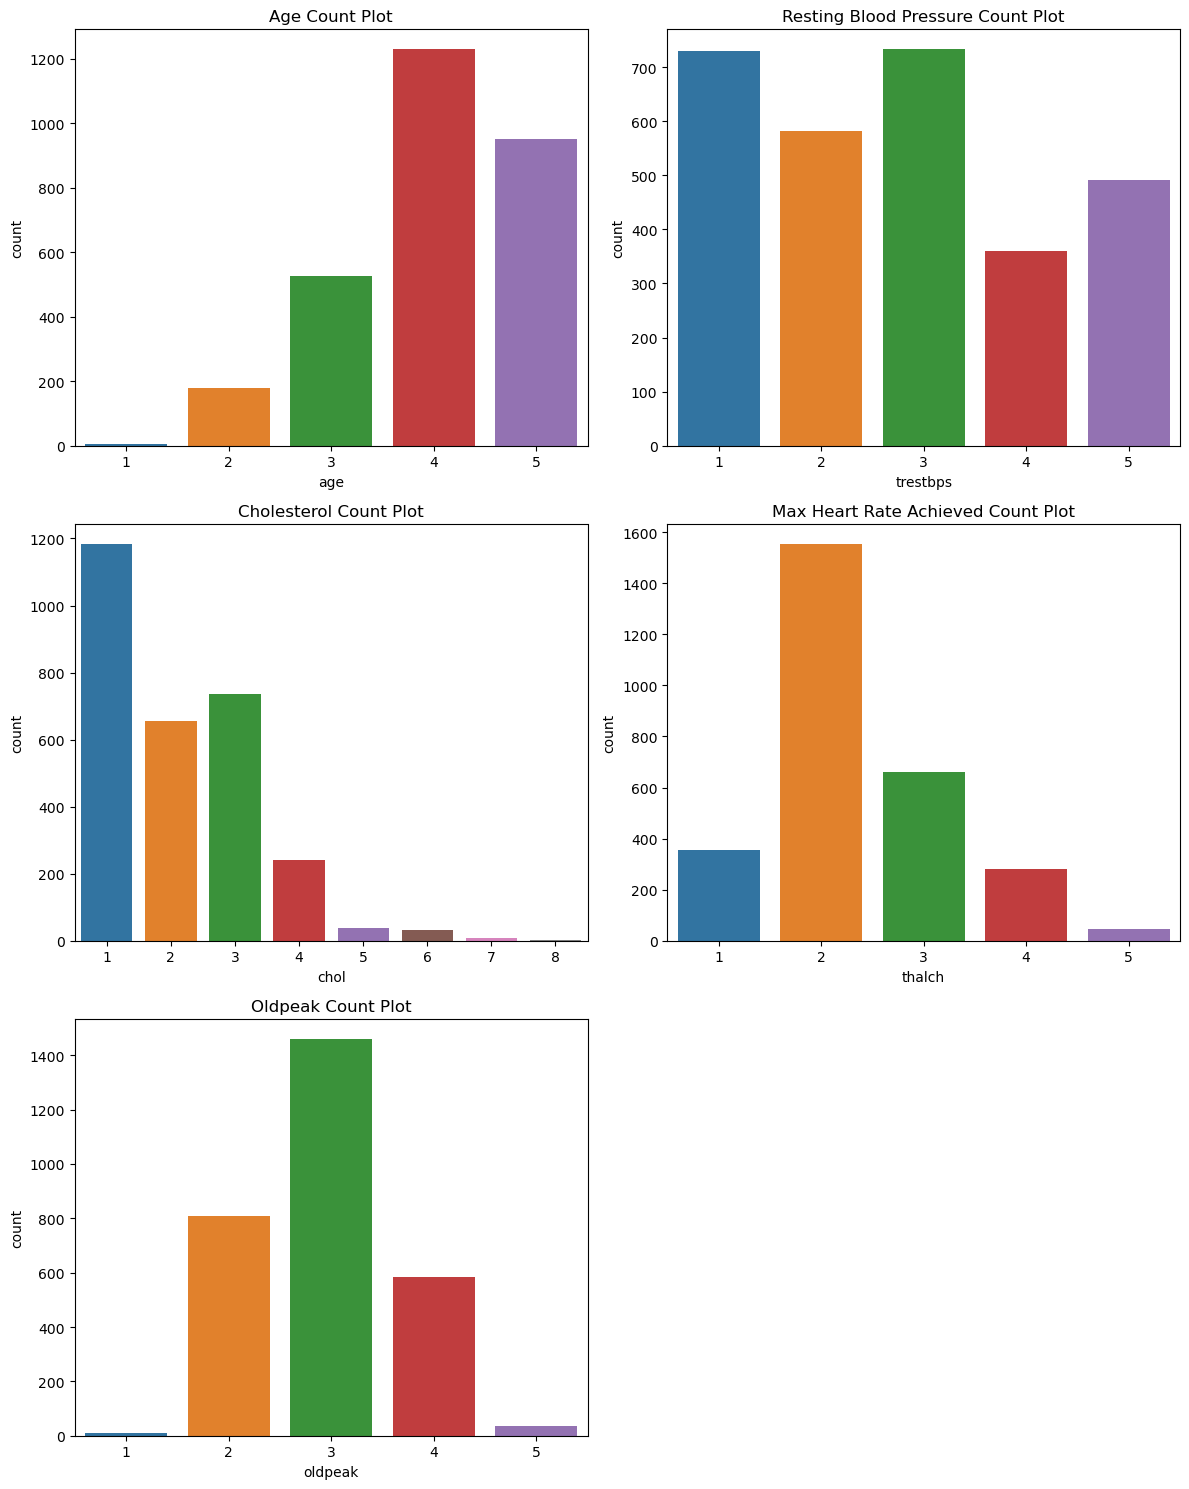

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

sns.countplot(x='age', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Age Count Plot')

sns.countplot(x='trestbps', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Resting Blood Pressure Count Plot')

sns.countplot(x='chol', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Cholesterol Count Plot')

sns.countplot(x='thalch', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Max Heart Rate Achieved Count Plot')

sns.countplot(x='oldpeak', data=df, ax=axs[2, 0])
axs[2, 0].set_title('Oldpeak Count Plot')

fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()

# check data frame

In [23]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,4,1,4,4,3,3,0,0,3,1,3,2,0,1,0
1,3,0,2,3,2,2,0,0,2,0,2,3,0,1,0
2,4,1,4,4,3,4,0,0,3,1,3,2,0,1,1
3,2,0,2,4,2,1,0,0,5,0,2,3,0,1,0
4,4,1,1,4,3,1,0,0,2,1,3,2,1,1,3


# feature correlation matrix in dataframe

In [24]:
correlation_matrix = df.corr()
num_corr = correlation_matrix['num'].sort_values(ascending=False)
print(num_corr)

num        1.000000
ca         0.779202
thal       0.525798
cp         0.293149
restecg    0.287860
exang      0.253421
sex        0.204044
dataset    0.155541
fbs        0.093133
slope     -0.351658
Name: num, dtype: float64


C:\Users\CompuStar\AppData\Local\Temp\ipykernel_6032\1968492310.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


# Define features and target variable

In [25]:
X = df.drop('num', axis=1)
y = df['num']

# Split the data (80% train, 20% test)

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the models

In [28]:
gb_clf = GradientBoostingClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# ensemble

In [29]:
stacking_clf = StackingClassifier(
    estimators=[
        ('gb', gb_clf),
        ('rf', rf_clf)
    ],
    final_estimator=LogisticRegression(solver='liblinear', max_iter=200),
    cv=5  
)

In [30]:
param_grid = {
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1],
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10, 20],
    'final_estimator__C': [0.1, 1, 10]
}

In [31]:
grid_search = GridSearchCV(estimator=stacking_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=0, 
                           n_jobs=-1)

# Fit the grid search

In [32]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=StackingClassifier(cv=5,
                                          estimators=[('gb',
                                                       GradientBoostingClassifier(random_state=42)),
                                                      ('rf',
                                                       RandomForestClassifier(random_state=42))],
                                          final_estimator=LogisticRegression(max_iter=200,
                                                                             solver='liblinear')),
             n_jobs=-1,
             param_grid={'final_estimator__C': [0.1, 1, 10],
                         'gb__learning_rate': [0.01, 0.1],
                         'gb__n_estimators': [50, 100],
                         'rf__max_depth': [None, 10, 20],
                         'rf__n_estimators': [50, 100]},
             scoring='accuracy')

# Predict and evaluate

In [33]:
best_stacking_clf = grid_search.best_estimator_
y_pred = best_stacking_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best model accuracy: {accuracy:.4f}")
print(f"Best parameters: {grid_search.best_params_}")

Best model accuracy: 0.9655
Best parameters: {'final_estimator__C': 10, 'gb__learning_rate': 0.01, 'gb__n_estimators': 50, 'rf__max_depth': 20, 'rf__n_estimators': 100}


In [34]:
# scaling

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Define the neural network model

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fitting
history = model.fit(X_train, y_train, epochs=120, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/120


73/73 [==============================] - 2s 7ms/step - loss: 1.3590 - accuracy: 0.4700 - val_loss: 1.1575 - val_accuracy: 0.6028
Epoch 2/120
73/73 [==============================] - 0s 3ms/step - loss: 0.9386 - accuracy: 0.6985 - val_loss: 0.8408 - val_accuracy: 0.7064
Epoch 3/120
73/73 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.7732 - val_loss: 0.7018 - val_accuracy: 0.7668
Epoch 4/120
73/73 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.8030 - val_loss: 0.6065 - val_accuracy: 0.7772
Epoch 5/120
73/73 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8263 - val_loss: 0.5475 - val_accuracy: 0.8083
Epoch 6/120
73/73 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.8441 - val_loss: 0.4977 - val_accuracy: 0.8307
Epoch 7/120
73/73 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8644 - val_loss: 0.4635 - val_accuracy: 0.8428
Epoch 8/1

Epoch 53/120
73/73 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9857 - val_loss: 0.1748 - val_accuracy: 0.9534
Epoch 54/120
73/73 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9870 - val_loss: 0.1700 - val_accuracy: 0.9482
Epoch 55/120
73/73 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9870 - val_loss: 0.1644 - val_accuracy: 0.9551
Epoch 56/120
73/73 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9888 - val_loss: 0.1723 - val_accuracy: 0.9516
Epoch 57/120
73/73 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9888 - val_loss: 0.1692 - val_accuracy: 0.9499
Epoch 58/120
73/73 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9896 - val_loss: 0.1806 - val_accuracy: 0.9516
Epoch 59/120
73/73 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9896 - val_loss: 0.1684 - val_accuracy: 0.9568
Epoch 

73/73 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9952 - val_loss: 0.2020 - val_accuracy: 0.9603
Epoch 111/120
73/73 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.2090 - val_accuracy: 0.9551
Epoch 112/120
73/73 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9957 - val_loss: 0.2190 - val_accuracy: 0.9603
Epoch 113/120
73/73 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9978 - val_loss: 0.2148 - val_accuracy: 0.9568
Epoch 114/120
73/73 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.2149 - val_accuracy: 0.9603
Epoch 115/120
73/73 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.2101 - val_accuracy: 0.9603
Epoch 116/120
73/73 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.2060 - val_accuracy: 0.9516
Epoch 117/120

In [36]:
# Evaluate the model on test data
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# Convert y_test back to its original format
y_test_original = y_test.argmax(axis=1)

# acc
print(classification_report(y_test_original, y_pred))
print("Accuracy:", accuracy_score(y_test_original, y_pred))

19/19 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        86
           1       0.89      0.99      0.94       152
           2       0.98      0.98      0.98       122
           3       0.98      1.00      0.99       126
           4       1.00      1.00      1.00        93

    accuracy                           0.96       579
   macro avg       0.97      0.95      0.96       579
weighted avg       0.97      0.96      0.96       579

Accuracy: 0.9620034542314335


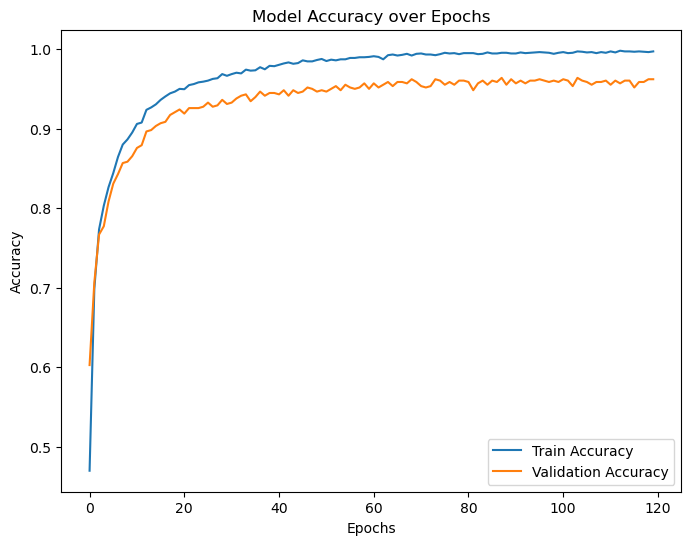

In [37]:
# Plot the training and validation accuracy over epochs

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
model.score(X_test,y_test)

0.9602763385146805